# Benchmarking cell2location pyro model using softplus/exp for scales

In [1]:
import sys, ast, os
#sys.path.insert(1, '/nfs/team205/vk7/sanger_projects/BayraktarLab/cell2location/')
sys.path.insert(1, '/nfs/team205/vk7/sanger_projects/BayraktarLab/scvi-tools/')

import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import matplotlib as mpl
data_type='float32'

#import cell2location_model
#import cell2location_module_scvi
import scvi

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
import seaborn as sns

### The purpose of the notebook is to benchmark several versions of the model using mouse brain data.

In [2]:
sc_data_folder = '/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_data/mouse_visium_snrna/'
sp_data_folder = '/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/benchmarking/with_tissue_zones/data/'
results_folder = '/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/benchmarking/with_tissue_zones/real_mg/pyro/'

## Read datasets and train cell2location

Data can be downloaded as follows:

```bash
wget https://cell2location.cog.sanger.ac.uk/paper/synthetic_with_tissue_zones/synth_adata_real_mg_20210131.h5ad
wget https://cell2location.cog.sanger.ac.uk/paper/synthetic_with_tissue_zones/training_5705STDY8058280_5705STDY8058281_20210131.h5ad
```

In [3]:
adata_vis = anndata.read(f'{sp_data_folder}synth_adata_real_mg_20210131.h5ad')
adata_vis.uns['spatial'] = {'x': 'y'}
adata_vis = adata_vis[adata_vis.obs['sample'].isin([f'exper{i}' for i in range(5,10)]),:]

adata_snrna_raw = anndata.read(f'{sp_data_folder}training_5705STDY8058280_5705STDY8058281_20210131.h5ad')

/nfs/team283/vk7/software/miniconda3farm5/envs/scvi-env2/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [4]:
[f'exper{i}' for i in range(5)]

['exper0', 'exper1', 'exper2', 'exper3', 'exper4']

In [5]:
import scipy
adata_snrna_raw.X = scipy.sparse.csr_matrix(adata_snrna_raw.X)

Add counts matrix as `adata.raw` 

In [6]:
adata_snrna_raw.raw = adata_snrna_raw
adata_vis.raw = adata_vis

In [7]:
# compute average for each cluster
aver = scvi.external.cell2location.compute_cluster_averages(adata_snrna_raw, 'annotation_1')

# make sure the order of gene matches between aver and x_data
aver = aver.loc[adata_vis.var_names,:]

# generate one-hot encoded matrix telling which obs belong to whic samples
obs2sample_df = pd.get_dummies(adata_vis.obs['sample'])

## Model training

In [8]:
adata_vis = scvi.external.cell2location.setup_anndata(adata=adata_vis, cell_state_df=aver, batch_key="sample")

INFO     Using batches from adata.obs["sample"]                                              
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              


/nfs/team283/vk7/software/miniconda3farm5/envs/scvi-env2/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/nfs/team283/vk7/software/miniconda3farm5/envs/scvi-env2/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/nfs/team283/vk7/software/miniconda3farm5/envs/scvi-env2/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


INFO     Successfully registered anndata object containing 12500 cells, 12809 vars, 5        
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/nfs/team283/vk7/software/miniconda3farm5/envs/scvi-env2/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/nfs/team283/vk7/software/miniconda3farm5/envs/scvi-env2/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [9]:
adata_vis.uns['_scvi']

{'scvi_version': '0.0.0',
 'categorical_mappings': {'_scvi_batch': {'original_key': 'sample',
   'mapping': array(['exper5', 'exper6', 'exper7', 'exper8', 'exper9'], dtype=object)},
  '_scvi_labels': {'original_key': '_scvi_labels', 'mapping': array([0])}},
 'data_registry': {'X': {'attr_name': 'X', 'attr_key': 'None'},
  'batch_indices': {'attr_name': 'obs', 'attr_key': '_scvi_batch'},
  'local_l_mean': {'attr_name': 'obs', 'attr_key': '_scvi_local_l_mean'},
  'local_l_var': {'attr_name': 'obs', 'attr_key': '_scvi_local_l_var'},
  'labels': {'attr_name': 'obs', 'attr_key': '_scvi_labels'},
  'ind_x': {'attr_name': 'obs', 'attr_key': '_indices'}},
 'summary_stats': {'n_batch': 5,
  'n_cells': 12500,
  'n_vars': 12809,
  'n_labels': 1,
  'n_proteins': 0,
  'n_continuous_covs': 0,
  'n_obs': 12500,
  'n_factors': 49},
 '_scvi_factors': {'varm_key': 'cell_state',
  'mapping': array(['Astro_AMY', 'Astro_AMY_CTX', 'Astro_CTX', 'Astro_HPC',
         'Astro_HYPO', 'Astro_THAL_lat', 'Astro_THA

In [10]:
adata_vis.obs['_scvi_batch']

exper5_location_0       0
exper5_location_1       0
exper5_location_2       0
exper5_location_3       0
exper5_location_4       0
                       ..
exper9_location_2495    4
exper9_location_2496    4
exper9_location_2497    4
exper9_location_2498    4
exper9_location_2499    4
Name: _scvi_batch, Length: 12500, dtype: int8

In [11]:
mod = scvi.external.Cell2location(adata_vis, batch_size=None, 
                                  N_cells_per_location=8)

In [12]:
mod.train(max_epochs=30000, lr=0.005, use_gpu=True)

  0%|          | 0/30000 [00:00<?, ?it/s]

In [13]:
means = mod.module.guide.median()
means = {k: means[k].cpu().detach().numpy() 
         for k in means.keys()}

In [14]:
means['w_sf'].shape

(12500, 49)

In [15]:
mod_m = scvi.external.Cell2location(adata_vis, batch_size=500, 
                                    N_cells_per_location=8)

In [16]:
mod_m.train(max_epochs=30000, lr=0.005, use_gpu=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/30000:   0%|          | 0/30000 [00:00<?, ?it/s]

/nfs/team283/vk7/software/miniconda3farm5/envs/scvi-env2/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:52: UserWarning: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer
  warnings.warn(*args, **kwargs)


Epoch 30000/30000: 100%|██████████| 30000/30000 [18:29:54<00:00,  2.22s/it, v_num=1, train_loss_step=1.54e+8, train_loss_epoch=1.54e+8]   


In [17]:
means_m = mod_m.module.guide.median()
means_m = {k: means_m[k].cpu().detach().numpy() 
         for k in means_m.keys()}

In [18]:
means_m

{'m_g_alpha_hyp': array(0.43737125, dtype=float32),
 'm_g_beta_hyp': array(4.863829, dtype=float32),
 'm_g': array([[0.03034262, 0.03387994, 0.10000759, ..., 0.00128045, 0.00058936,
         0.00907924]], dtype=float32),
 'n_s_cells_per_location': array([[15.172559 ],
        [13.874435 ],
        [16.004934 ],
        ...,
        [13.0549965],
        [13.203791 ],
        [13.533003 ]], dtype=float32),
 'y_s_groups_per_location': array([[8.076294 ],
        [7.94512  ],
        [7.814806 ],
        ...,
        [8.104404 ],
        [8.038522 ],
        [7.9116364]], dtype=float32),
 'z_sr_groups_factors': array([[0.01206796, 0.00979814, 0.01815396, ..., 0.01227255, 0.00648506,
         0.00818761],
        [0.00876682, 0.00665532, 0.0091276 , ..., 0.00754219, 0.00780271,
         0.00664645],
        [0.00984381, 0.01044265, 0.01350837, ..., 0.01170192, 0.00940248,
         0.00848981],
        ...,
        [0.00602545, 0.01178879, 0.00783239, ..., 0.00587189, 0.00482805,
         0

### Compare ELBO as training progresses

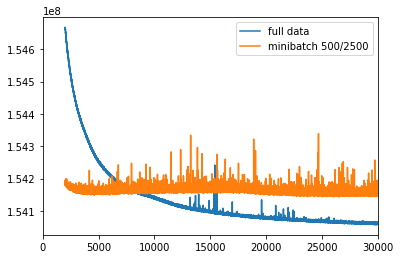

In [19]:
plt.plot(range(2000, len(mod.module.history_)), np.array(mod.module.history_)[2000:]);
plt.plot(mod_m.module.history_['train_loss_epoch'].index[2000:], 
         np.array(mod_m.module.history_['train_loss_epoch'].values.flatten())[2000:]);
plt.legend(labels=['full data', 'minibatch 500/2500']);
plt.xlim(0, len(mod.module.history_));

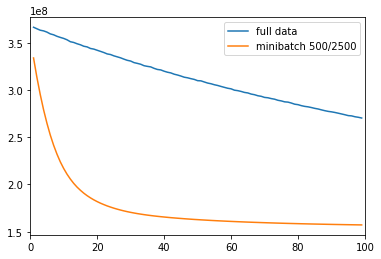

In [20]:
plt.plot(range(1, 100), np.array(mod.module.history_)[1:100]);
plt.plot(mod_m.module.history_['train_loss_epoch'].index[1:100], 
         np.array(mod_m.module.history_['train_loss_epoch'].values.flatten())[1:100]);
plt.legend(labels=['full data', 'minibatch 500/2500']);
plt.xlim(0, 100);

### Evaluate accuracy using $R^2$

In [21]:
means = mod.module.guide.median()
means = {k: means[k].cpu().detach().numpy() 
         for k in means.keys()}
means_m = mod_m.module.guide.median()
means_m = {k: means_m[k].cpu().detach().numpy() 
                  for k in means_m.keys()}

In [22]:
from re import sub
cell_count = adata_vis.obs.loc[:, ['cell_abundances_' in i for i in adata_vis.obs.columns]]
cell_count.columns =  [sub('cell_abundances_', '', i) for i in cell_count.columns]
cell_count_columns = cell_count.columns

infer_cell_count = pd.DataFrame(means['w_sf'], index=adata_vis.obs_names, 
                                columns=aver.columns)
infer_cell_count = infer_cell_count[cell_count.columns]

infer_cell_count_m = pd.DataFrame(means_m['w_sf'], index=adata_vis.obs_names, 
                                columns=aver.columns)
infer_cell_count_m = infer_cell_count_m[cell_count.columns]

In [23]:
infer_cell_count.iloc[0:5,0:5], infer_cell_count_m.iloc[0:5,0:5]

(                      Inh_3   Ext_Pir   Oligo_2  Astro_HYPO   Ext_L25
 exper5_location_0  0.459207  0.112699  0.071557    1.284724  0.733394
 exper5_location_1  0.998605  0.089436  0.283974    3.076186  0.844078
 exper5_location_2  1.016943  0.026935  0.103925    1.612388  1.072916
 exper5_location_3  0.689759  0.033771  0.163614    2.680057  0.857357
 exper5_location_4  0.671093  0.034248  0.478538    2.348995  1.451118,
                       Inh_3   Ext_Pir   Oligo_2  Astro_HYPO   Ext_L25
 exper5_location_0  1.002721  0.478794  0.250050    2.322826  1.781446
 exper5_location_1  1.487352  0.447741  0.454089    5.269233  2.046621
 exper5_location_2  1.812280  0.299415  0.305121    3.143264  2.059350
 exper5_location_3  1.463148  0.312710  0.408030    5.107416  2.343045
 exper5_location_4  1.616214  0.363282  0.610629    4.419535  2.570379)

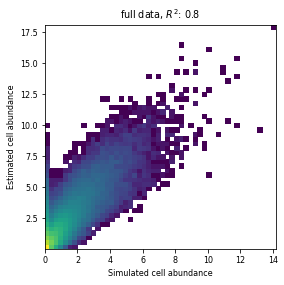

In [31]:
rcParams['figure.figsize'] = 4, 4
rcParams["axes.facecolor"] = "white"

plt.hist2d(cell_count.values.flatten(), 
           infer_cell_count.values.flatten(),# / np.mean(adata_vis_res.var['gene_level'].values),
           bins=[50, 50], norm=mpl.colors.LogNorm());
plt.xlabel('Simulated cell abundance');
plt.ylabel('Estimated cell abundance');
plt.title(r'full data, $R^2$: ' \
          + str(np.round(np.corrcoef(cell_count.values.flatten(), 
           infer_cell_count.values.flatten()), 3)[0,1]));
#plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
#plt.savefig(fig_path + '/Cell_density_cor.pdf')

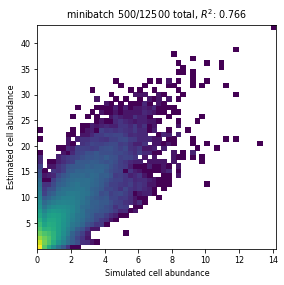

In [32]:
rcParams['figure.figsize'] = 4, 4
rcParams["axes.facecolor"] = "white"

plt.hist2d(cell_count.values.flatten(), 
           infer_cell_count_m.values.flatten(),# / np.mean(adata_vis_res.var['gene_level'].values),
           bins=[50, 50], norm=mpl.colors.LogNorm());
plt.xlabel('Simulated cell abundance');
plt.ylabel('Estimated cell abundance');
plt.title(r'minibatch 500/12500 total, $R^2$: ' \
          + str(np.round(np.corrcoef(cell_count.values.flatten(), 
           infer_cell_count_m.values.flatten()), 3)[0,1]));
#plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
#plt.savefig(fig_path + '/Cell_density_cor.pdf')

Original implementation of cell2location in pymc3 has $R^2 = 0.791$.

## Evaluate with PR curves

In [26]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import interpolate

with plt.style.context('seaborn'):
    seaborn_colors = mpl.rcParams['axes.prop_cycle'].by_key()['color']


def compute_precision_recall(pos_cell_count, infer_cell_proportions, mode='macro'):
    r""" Plot precision-recall curves on average and for each cell type.
    :param pos_cell_count: binary matrix showing which cell types are present in which locations
    :param infer_cell_proportions: inferred locations (the higher the more cells)
    """
    
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import average_precision_score
    
    ### calculating ###
    predictor = infer_cell_proportions.values + np.random.gamma(20, 1e-12, 
                                                                infer_cell_proportions.shape)
    # For each cell type
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i, c in enumerate(infer_cell_proportions.columns):
        precision[c], recall[c], _ = precision_recall_curve(pos_cell_count[:, i],
                                                            predictor[:, i])
        average_precision[c] = average_precision_score(pos_cell_count[:, i], predictor[:, i], average=mode)

    average_precision["averaged"] = average_precision_score(pos_cell_count, predictor,
                                                     average=mode)

    # A "micro-average": quantifying score on all classes jointly
    if mode == 'micro':
        precision_, recall_, threshold = precision_recall_curve(pos_cell_count.ravel(),
                                                                        predictor.ravel())
        #precision_[threshold < 0.1] = 0
        precision["averaged"], recall["averaged"] =  precision_, recall_

    elif mode == 'macro':
        precisions = []
        recall_grid = np.linspace(0, 1, 2000)

        for i, c in enumerate(infer_cell_proportions.columns):
            f = interpolate.interp1d(recall[c], precision[c])
            precision_interp = f(recall_grid)
            precisions.append(precision_interp)

        precision["averaged"] = np.mean(precisions, axis=0)
        recall['averaged'] = recall_grid

        
    return precision, recall, average_precision

def compare_precision_recall(pos_cell_count, infer_cell_proportions,
                             method_title, title='',
                             legend_loc=(0, -.37),
                             colors=sc.pl.palettes.default_102,
                             mode='macro', curve='PR'):
    
    r""" Plot precision-recall curves on average and for each cell type.
    :param pos_cell_count: binary matrix showing which cell types are present in which locations
    :param infer_cell_proportions: inferred locations (the higher the more cells), 
                                        list of inferred parameters for several methods
    :param method_title: title for each infer_cell_proportions
    :param title: plot title
    """
    # setup plot details
    from itertools import cycle
    colors = cycle(colors)
    lines = []
    labels = []
    roc = {}
    
    ### plotting ###
    for i, color in zip(range(len(infer_cell_proportions)), colors):
        
        if curve == 'PR':
            precision, recall, average_precision = compute_precision_recall(pos_cell_count, 
                                                                        infer_cell_proportions[i], 
                                                                        mode=mode)

            xlabel = 'Recall'
            ylabel = 'Precision'
            
            l, = plt.plot(recall["averaged"], precision["averaged"], color=color, lw=3)

        elif curve == 'ROC':
            FPR, TPR, average_precision = compute_roc(pos_cell_count, 
                                                                        infer_cell_proportions[i], 
                                                                        mode=mode)

            xlabel = 'FPR'
            ylabel = 'TPR'
            
            l, = plt.plot(FPR["averaged"], TPR["averaged"], color=color, lw=3)
            
        
        lines.append(l)

        labels.append(method_title[i] + '(' + curve + ' score = {0:0.2f})'
                      ''.format(average_precision["averaged"]))
        roc[method_title[i]] = average_precision["averaged"]


    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if legend_loc is not None:
        plt.legend(lines, labels, loc=legend_loc, prop=dict(size=8))

    #plt.show()
    return roc

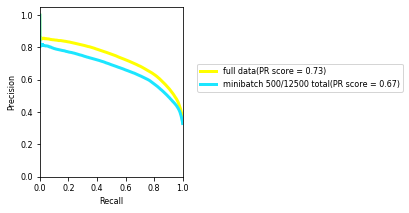

In [29]:
rcParams['figure.figsize'] = 6, 3
rcParams['font.size'] = 8

results = [
    infer_cell_count,
    infer_cell_count_m
]

names = [
    'full data', 
    'minibatch 500/12500 total',
]

compare_precision_recall(cell_count.values > 0.1, 
                         results,
                         method_title=names, 
                         legend_loc=(1.1, 0.5))
plt.tight_layout()

Original implementation of cell2location in pymc3 has PR score = 0.66.

In [28]:
import sys
for module in sys.modules:
    try:
        print(module,sys.modules[module].__version__)
    except:
        try:
            if  type(modules[module].version) is str:
                print(module,sys.modules[module].version)
            else:
                print(module,sys.modules[module].version())
        except:
            try:
                print(module,sys.modules[module].VERSION)
            except:
                pass

ipykernel 5.3.4
ipykernel._version 5.3.4
json 2.0.9
re 2.2.1
IPython 7.20.0
IPython.core.release 7.20.0
logging 0.5.1.2
zlib 1.0
traitlets 5.0.5
traitlets._version 5.0.5
argparse 1.1
ipython_genutils 0.2.0
ipython_genutils._version 0.2.0
platform 1.0.8
pygments 2.7.4
pexpect 4.8.0
ptyprocess 0.7.0
decorator 4.4.2
pickleshare 0.7.5
backcall 0.2.0
prompt_toolkit 3.0.8
wcwidth 0.2.5
jedi 0.17.0
parso 0.8.1
colorama 0.4.4
ctypes 1.1.0
_ctypes 1.1.0
urllib.request 3.7
jupyter_client 6.1.7
jupyter_client._version 6.1.7
zmq 20.0.0
zmq.backend.cython 40303
zmq.backend.cython.constants 40303
zmq.sugar 20.0.0
zmq.sugar.constants 40303
zmq.sugar.version 20.0.0
jupyter_core 4.7.1
jupyter_core.version 4.7.1
_curses b'2.2'
dateutil 2.8.1
six 1.15.0
decimal 1.70
_decimal 1.70
distutils 3.7.9
scanpy 1.7.0
scanpy._metadata 1.7.0
packaging 20.9
packaging.__about__ 20.9
importlib_metadata 1.7.0
csv 1.0
_csv 1.0
numpy 1.20.0
numpy.core 1.20.0
numpy.core._multiarray_umath 3.1
numpy.lib 1.20.0
numpy.linalg.